# Test Coverage Introduction

**How do you know you've written enough tests?**

Test coverage! 
	
**Test coverage is the percentage of lines of code that are executed during all of the tests.**
* When you call for test coverage, your coverage tool `counts all of the executable lines of code` and then monitors the tests to see which lines of code the tests execute.
* The tool then **divides** the `number of executable lines of code` **by** the `total number of lines of code`.
* This result in the percentage of lines code that your test actually covered.
    

# Importance of test coverage

* High test coverage gives you confidence that a large amount of code executed during the tests.
* In turn, the more lines of code executed through tests, the more confident you can be that the lines of code works as expected.
* To determine your level of test coverage, you use test coverage reports.
* These reports can reveal which lines of code were tested.
* But more importantly, they can **reveal which lines of code were not tested so that you can write more test cases that execute those lines of code**.

# Test Coverage report

Let’s look at what a test coverage reports looks like.

* Specifically, we’ll use the report from a python tool, called **Coverage**.
* We start by running the **"`coverage report -m`"** command and requesting a report.
* Th -m option will show us the missing lines of code, that is, lines that do not have test cases that execute them.
* We get a nice report that lists all of the program files with their statistics.
* For simplicity in this example, we only have one Python file: `server.py`.

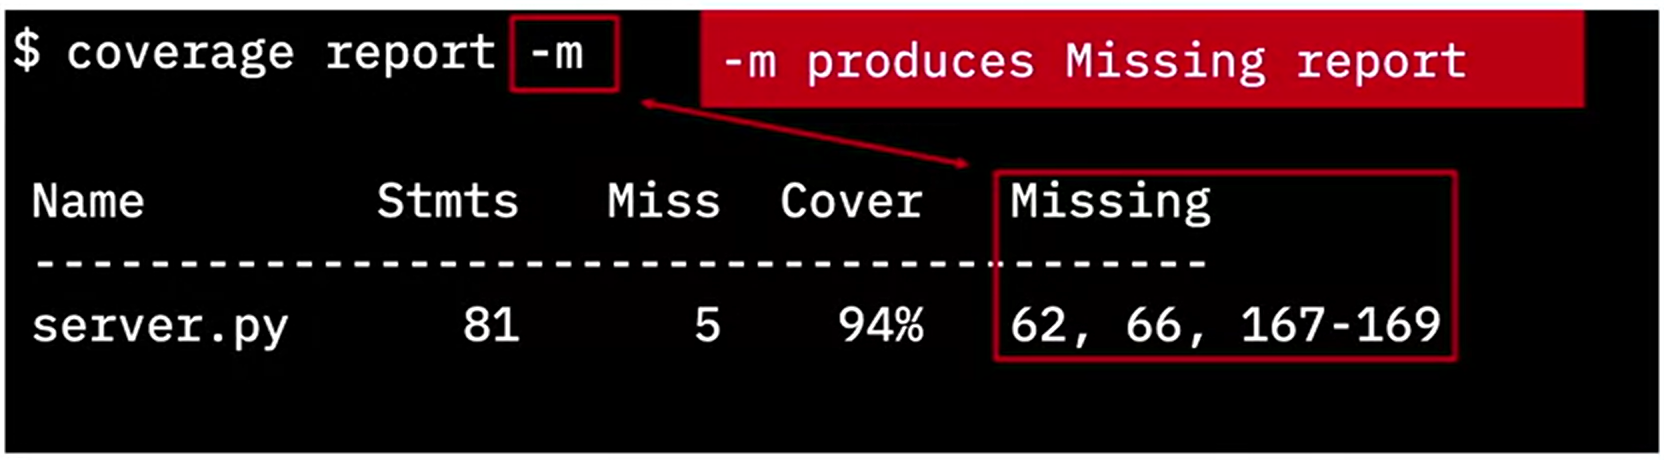

Let’s break down what this report tells us.
* It gives us the **name of the program files** tested.
* This report **shows the coverage file-wise** and is helpful when we have more than one python file that makes up our application.
* It then gives us the `total number of executable statements` in that file.
    * It states that `server.py` has `81` statements.
    * This number is the **numerator** of our **code coverage calculation**.
* It then gives us `how many lines of code were not executed` in the test cases.
    * It calls this column **"Miss"** for missing coverage.
    * It states that `server.py` has `5` **missing lines**, meaning that `5` out of the `81` lines of code did not get executed during the tests.
    * So we have no idea how those 5 lines of code will behave in production.
* Then it gives us the `percentage of lines of code that were covered by the tests` using the previous two numbers.
    * In this example we have **94% test coverage**, meaning `94%` of the `81` lines of code were executed during test.
* Finally it gives us the `line numbers that did not have test cases`.
    * This info is critical because now we know where to concentrate our tests.
    * We need to go write more test cases to cause those lines of code to be executed.

Again, this missing report will only show up if you add the **"`-m`"** parameter to the coverage command or specify it as a parameter while running `nosetests` with coverage.

# Missing Coverage

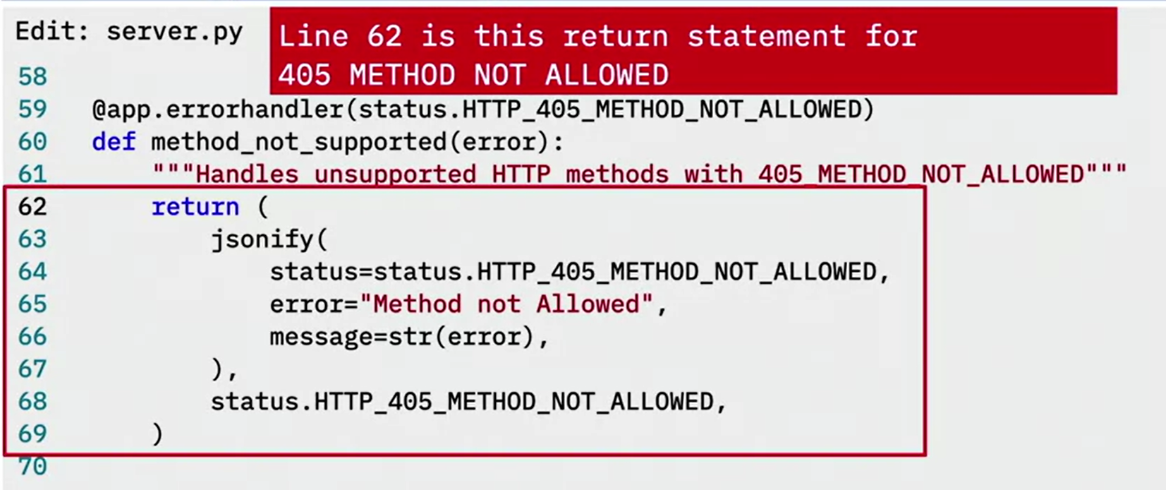

Let’s check line `62` in **`server.py`** and try to think of a way to write a test case that will cause it to execute.
* We edit the file `server.py` and scroll down to line `62`, we see what it's doing.
* It looks like this function is one of the **error handlers**.
* We find that line `62` is a return statement that reports back that a **"405 method not allowed"** has been encountered.
* It looks like it's returning the error message with a status.
* Our task now is to figure out how to create a test case that would cause a 405 method not allowed in our code.


# Which method is not allowed?

Let's look at what is meant by a method not allowed.
* I know this is a Python Flask web application.
* Flask has a command called **"flask routes"** that will return all the endpoints or **"routes"** that an application supports.
* When we run this command we see all of the valid routes that have been implemented.

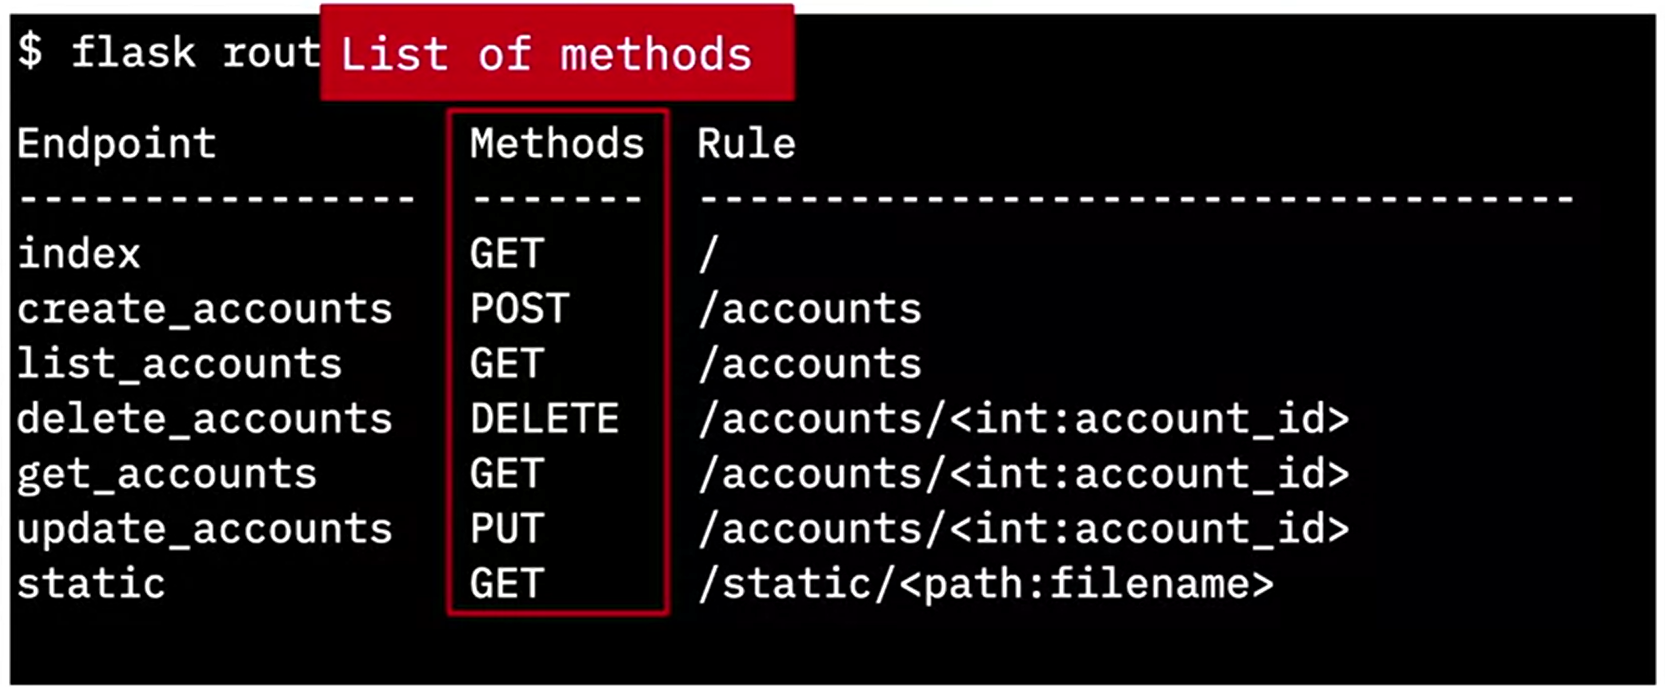

* This “**Methods**” column in the middle of the report lists the HTTP methods that each endpoint supports.
* In order to cause a "**405 method not allowed**" error, we just need to use an unsupported method on an endpoint.
* We see that the "`/accounts`" endpoint only supports **POST** and **GET** method.
* If we want to cause a "**405 method not allowed**" we can call it with an unsupported method like **PUT**.
* If we call **PUT** on "`/accounts`" it will not match **POST** or **GET** and thus it will return a "**method not allowed.**"


***Let's go do that by adding a new test case.***

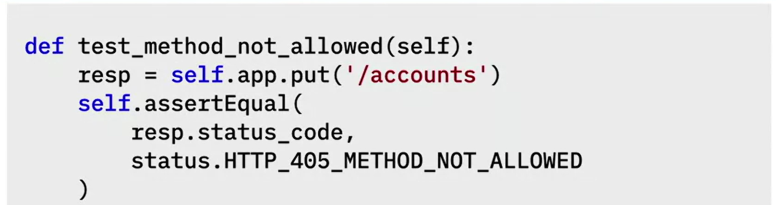

* We call the new test "**test_method_not_allowed**" so that it is easy to determine what is this test case supposed to do.
* Then we make a call to **PUT** on the "`/accounts`" endpoint and store the result in a variable called "**resp**" for response.
* This should give us the behavior that we are looking for.
* Finally, we make an assertion that the "**status_code**" in the "resp" variable will match the HTTP response of "**405 method not allowed.**"

# Run tests and coverage again

Let's go back to the command line, and run the tests again and get a coverage report making sure we add the **`-m`** option.

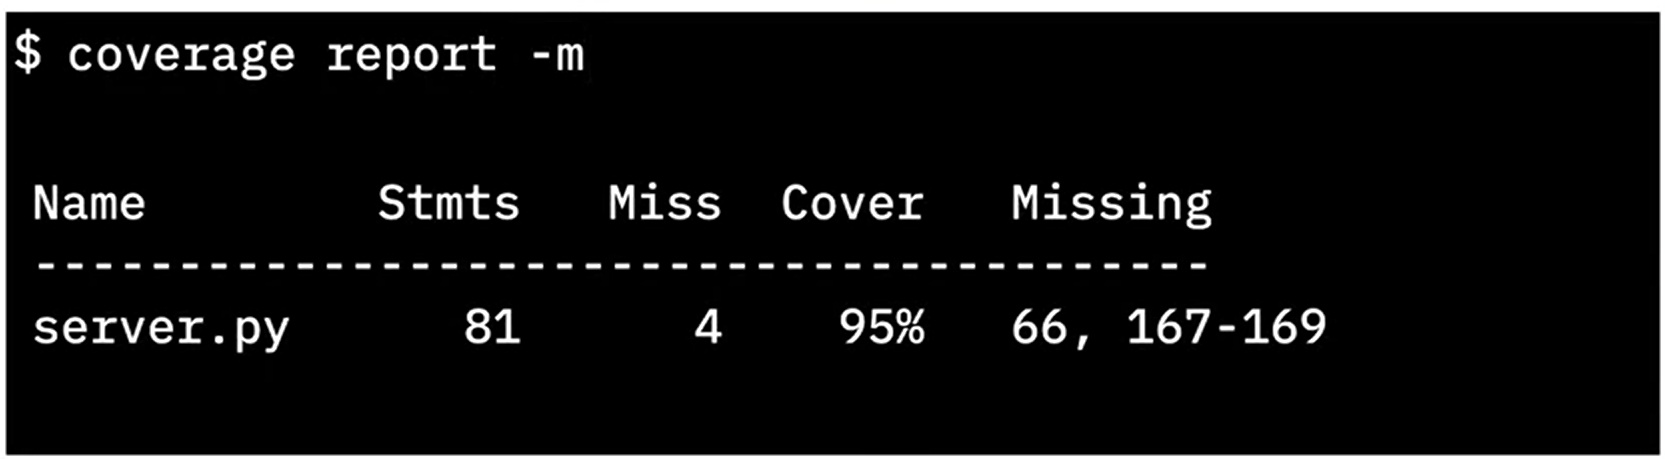

* Now we can see that there are only `4` **lines of code without tests**.
* Our code coverage has gone up to `95%` because more lines of code have test cases.
* Finally, our missing report has gone down because line `62` is no longer missing coverage.
* Next you should go back and repeat the process for line `66` and lines `167` through `169`.
* That's all there is to making sure that you have high code coverage.

# Full test coverage

You may have noticed that just testing the **"happy"** paths, that is, the paths where everything works, is not going to get all of your code covered. You must test the **"sad"** paths as well.
* **Sad paths** are the "`else`" and an "`if-then-else`" statement.
* They’re paths that catch **error conditions** like we had in our **"405 method not allowed"** example.
* To get full test coverage you need to think of scenarios that will exercise all of your code.

**But remember this: `even with 100% test coverage your code can still have bugs`.**
* `100%` test coverage only means that every line of code has been tested with some known good data.
* You can still pass bad data into your code and find bugs.
* So don't stop testing when your code cover reaches `100%`.

Keep challenging the integrity of your code with bad data, corner cases make sure your code behaves as expected under both favorable and adverse conditions.
